<a href="https://colab.research.google.com/github/jaymey/CAP5610/blob/main/CAP5610HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-surprise

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from surprise import SVD
from surprise import KNNBasic
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate

##a

In [26]:
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5,5), skip_lines=1)
movie_ratings = Dataset.load_from_file("ratings_small.csv",reader=reader)

##b & c

In [29]:
PMF = SVD(biased=False)
cross_validate(PMF, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0177  1.0145  1.0215  1.0089  0.9993  1.0124  0.0077  
MAE (testset)     0.7843  0.7809  0.7858  0.7799  0.7706  0.7803  0.0053  
Fit time          4.89    4.83    4.86    4.88    4.86    4.86    0.02    
Test time         0.27    0.20    0.15    0.24    0.15    0.20    0.05    



In [30]:
sim_options = {'user_based' : True}
User_based = KNNBasic(sim_options=sim_options)
cross_validate(User_based, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9668  0.9666  0.9660  0.9666  0.9742  0.9681  0.0031  
MAE (testset)     0.7417  0.7420  0.7399  0.7464  0.7490  0.7438  0.0034  
Fit time          0.15    0.17    0.18    0.18    0.17    0.17    0.01    
Test time         1.89    1.82    1.75    1.84    1.79    1.82    0.05    



In [31]:
sim_options = {'user_based' : False}
Item_based = KNNBasic(sim_options=sim_options)
cross_validate(Item_based, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9392  0.9447  0.9304  0.9322  0.9288  0.9351  0.0060  
MAE (testset)     0.7256  0.7281  0.7170  0.7187  0.7161  0.7211  0.0049  
Fit time          4.66    4.31    3.92    4.24    3.92    4.21    0.27    
Test time         8.09    7.86    7.96    8.19    7.98    8.02    0.11    



##e

In [33]:
cosine = {'name' : 'cosine', 'user_based' : True}
msd = {'name' : 'MSD', 'user_based' : True}
pearson = {'name' : 'pearson', 'user_based' : True}

User_based_cosine = KNNBasic(sim_options=cosine)
User_based_msd = KNNBasic(sim_options=msd)
User_based_pearson = KNNBasic(sim_options=pearson)

cross_validate(User_based_cosine, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()
cross_validate(User_based_msd, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()
cross_validate(User_based_pearson, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9874  0.9917  1.0007  1.0017  0.9817  0.9926  0.0077  
MAE (testset)     0.7620  0.7642  0.7698  0.7735  0.7622  0.7663  0.0046  
Fit time          0.44    0.44    0.43    0.44    0.53    0.46    0.04    
Test time         1.81    1.84    1.98    1.78    2.47    1.98    0.26    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...


In [34]:
cosine = {'name' : 'cosine', 'user_based' : False}
msd = {'name' : 'MSD', 'user_based' : False}
pearson = {'name' : 'pearson', 'user_based' : False}

Item_based_cosine = KNNBasic(sim_options=cosine)
Item_based_msd = KNNBasic(sim_options=msd)
Item_based_pearson = KNNBasic(sim_options=pearson)

cross_validate(Item_based_cosine, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()
cross_validate(Item_based_msd, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()
cross_validate(Item_based_pearson, movie_ratings, measures=['rmse','mae'], cv=5, verbose=True)
print()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9963  0.9973  0.9871  0.9996  0.9946  0.9950  0.0043  
MAE (testset)     0.7762  0.7764  0.7689  0.7764  0.7757  0.7747  0.0029  
Fit time          16.12   14.14   14.05   14.60   14.53   14.69   0.75    
Test time         8.11    7.69    8.00    7.83    8.11    7.95    0.17    

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...


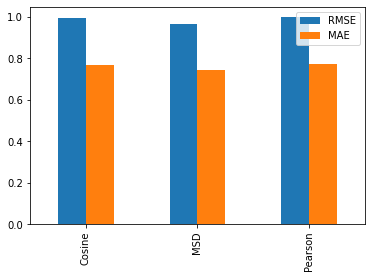

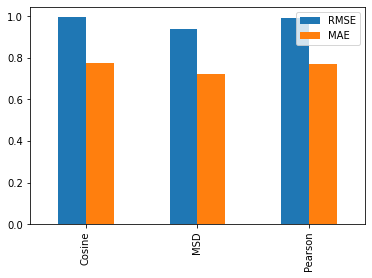

In [38]:
User_based_compare = [[0.9926, 0.7663],[0.9678, 0.7437],[0.9992, 0.7729]]
Item_based_compare = [[0.9950, 0.7747],[0.9354, 0.7213],[0.9893, 0.7679]]

User_based_df = pd.DataFrame(User_based_compare, columns=['RMSE','MAE'], index=['Cosine','MSD','Pearson'])
Item_based_df = pd.DataFrame(Item_based_compare, columns=['RMSE','MAE'], index=['Cosine','MSD','Pearson'])

User_based_df.plot.bar()
Item_based_df.plot.bar()

##f & g

In [41]:
user = {'user_based':True}

user_results = []
for k in range(10,100,10):
  User_based = KNNBasic(k=k, sim_options=user)
  result = cross_validate(User_based, movie_ratings, measures=['rmse','mae'], cv=5)
  user_results.append([np.mean(result['test_rmse']), np.mean(result['test_mae'])])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [42]:
item = {'user_based':False}

item_results = []
for k in range(10,100,10):
  Item_based = KNNBasic(k=k, sim_options=item)
  result = cross_validate(Item_based, movie_ratings, measures=['rmse','mae'], cv=5)
  item_results.append([np.mean(result['test_rmse']), np.mean(result['test_mae'])])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [48]:
User_k = pd.DataFrame(user_results, columns=['RMSE','MAE'], index=pd.Index(range(10,100,10)))
print("User based")
print(User_k)
print()

Item_k = pd.DataFrame(item_results, columns=['RMSE','MAE'], index=pd.Index(range(10,100,10)))
print("Item based")
print(Item_k)

User based
        RMSE       MAE
10  0.967795  0.739865
20  0.963743  0.738428
30  0.965756  0.741240
40  0.969302  0.744990
50  0.973147  0.747974
60  0.972036  0.747858
70  0.973328  0.749240
80  0.974593  0.751462
90  0.976332  0.752178

Item based
        RMSE       MAE
10  0.975309  0.754747
20  0.948998  0.733272
30  0.938168  0.723802
40  0.934431  0.720889
50  0.932574  0.719099
60  0.932354  0.718654
70  0.931257  0.717765
80  0.931805  0.717992
90  0.931966  0.718335


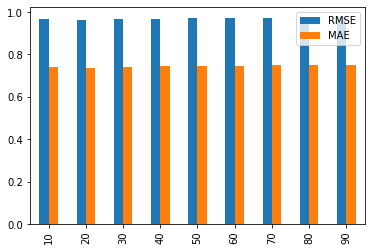

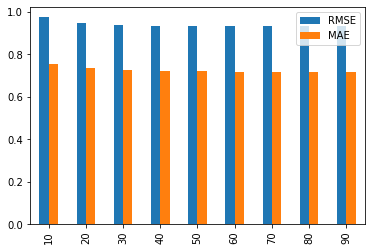

In [49]:
User_k.plot.bar()
Item_k.plot.bar()